#Problem 3: Sound Clustering

by Haotian Zhang

# New Section

In sound processing, the [mel-frequency cepstrum](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22).) (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

**Mel-frequency cepstral coefficients** (MFCCs) are coefficients that collectively make up an MFC. MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone. MFCCs are commonly derived as follows:
1. Take the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) of (a windowed excerpt of) a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using [triangular overlapping windows](https://en.wikipedia.org/wiki/Window_function#Triangular_window).
3.	Take the logs of the powers at each of the mel frequencies.
4.	Take the [discrete cosine transform](https://en.wikipedia.org/wiki/Discrete_cosine_transform) of the list of mel log powers, as if it were a signal.
5.	The MFCCs are the amplitudes of the resulting spectrum.

Sounds scary and tedious? No worries. we will help you go through a simple process using Python to do the `feature extraction` for sound (music, speech, etc.) and then `classify` the audio signal into different clusters. 


### Feature Extraction 

**Extraction of features is a very important part in analyzing and finding relations between different things**. The data provided of audio cannot be understood by the models directly to convert them into an understandable format feature extraction is used. It is a process that explains most of the data but in an understandable way. Feature extraction is required for classification, prediction and recommendation algorithms.



In P1, we will first extract features of animal sound files that will help us to classify the sound into different clusters. Let’s get familiar with the audio signal first. The audio signal is a 3-dimensional signal in which the three axes represent the time, amplitude and frequency.



We will be using [librosa](https://librosa.github.io/librosa/) for analyzing and extracting features of an audio signal. For playing audio, we will use [pyAudio](https://people.csail.mit.edu/hubert/pyaudio/docs/) so that we can play music directly on Colab. Download three audio files (`Bluejay.mp3`, `Dove.mp3` and `Ducks.wav`) provided on Canvas webapge. Upload your files by clicking `Files -> Upload to your session storage`.

In [2]:
# let's install librosa and pyAudio first!
!pip install librosa
!pip install numba==0.48

!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

     |████████████████████████████████| 3.5 MB 5.0 MB/s 
     |████████████████████████████████| 20.2 MB 6.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Loading an audio
# let's take bluejay.mp3 as an example
import librosa

audio_path = "/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Bluejay.mp3"
x , sr = librosa.load(audio_path)
print(type(x), type(sr));

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


`.load` loads an audio file and decodes it into a 1-dimensional array which is a time series `x` , and `sr` is a sampling rate of `x` . Default `sr` is 22kHz. We can override the `sr` by

In [5]:
librosa.load(audio_path, sr=44100)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0.00015259, 0.00018311, 0.00018311, ..., 0.        , 0.        ,
        0.        ], dtype=float32), 44100)

We can also disable sampling by:

In [6]:
librosa.load(audio_path, sr=None)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0.00015259, 0.00018311, 0.00018311, ..., 0.        , 0.        ,
        0.        ], dtype=float32), 44100)

In [7]:
# Playing an audio
import IPython.display as ipd
ipd.Audio(audio_path)

`IPython.display` allow us to play audio on jupyter notebook directly. It has a very simple interface with some basic buttons.

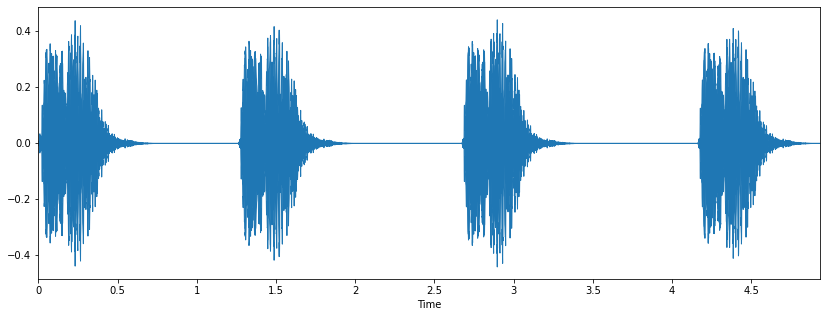

In [8]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr);

`librosa.display` is used to display the audio files in different formats such as wave plot, spectrogram, or colormap. Waveplots let us know the loudness of the audio at a given time. Spectogram shows different frequencies playing at a particular time along with its amplitude. Amplitude and frequency are important parameters of the sound and are unique for each audio. `librosa.display.waveplot` is used to plot waveform of amplitude vs. time where the first axis is an amplitude and second axis is time.

**MFCC - Mel-Frequency Cepstral Coefficients**

This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The MFCCs of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

(20, 213)


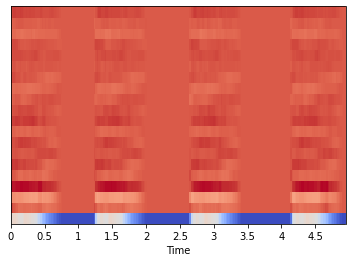

In [9]:
# MFCC — Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
# Displaying the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

`.mfcc` is used to calculate mfccs of a signal.

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

### Questions
*  **Q1**: Do the framing of Bird sounds using A=20ms windows, B=10ms, and A-B=10ms of overlapping. 4 seconds of Bird sounds will generate 399 frames.
*  **Q2**: Generate 13 MFCC coefficients for every frame. Every 4 sec of Bird sound will have 399x13 MFCC coefficients matrix as a result.
*  **Q3**: Plot the 399x13 MFCC coefficients for all three Bird sounds in Python.

Here I provide some helpful functions to use.

In [10]:
import scipy
import numpy as np

np.random.seed(42)

# This is a fixed SampleRateSetting
_SAMPLING_FREQ = 12000

def _get_audio(audio_path):
    # sr=None disables dynamic resampling
    x, sr = librosa.load(audio_path, sr=_SAMPLING_FREQ)
    print(f'Loaded {audio_path} (sampling rate {sr})')
    
    return x, sr

def _display_audio(x, sr):
    # Show audio to play in Jupyter
    ipd.display(ipd.Audio(x, rate=sr))

def _compute_mfcc(x, sr, N_frames=399, Tw=20, Ts=10, alpha=0.97, R=(300, 3700), M=20, C=13, L=22):
    """
    Compute MFCCs
    
    This is a rough re-implementation of HTK MFCC MATLAB using librosa:
    https://www.mathworks.com/matlabcentral/fileexchange/32849-htk-mfcc-matlab?focused=5199998&tab=function
    
    N_frames: Number of frames
    Tw: Analysis frame duration (ms)
    Ts: Analysis frame shift (ms)
    alpha: Preemphasis coefficient
    R: Frequency range to consider (Hz)
    M: Number of filterbank channels
    C: Number of cepstral coefficients
    L: Cepstral sine lifter parameter
    """
    # Preemphasis filtering, per implementation
    x = scipy.signal.lfilter([1-alpha], 1, x)

    # Frame duration (samples)
    Nw = round((Tw*10**-3)*sr)
    # Frame shift (samples)
    Ns = round((Ts*10**-3)*sr)
    
    # Length of FFT analysis
    nfft = int(2**np.ceil(np.log2(np.abs(Nw))))

    # compute melspectogram separately to modify more params
    S = librosa.feature.melspectrogram(
        # librosa.feature.melspectrogram
        y=x, sr=sr,
        n_fft=nfft,
        hop_length=Ns,
        win_length=Nw,
        window=scipy.signal.hamming,
        power=1.0,
        center=False,  # Disable padding, per vec2frames() call in HTK MFCC MATLAB
        # librosa.filters.mel
        fmin=R[0],
        fmax=R[1],
        n_mels=M,
        htk=True,  # Use HTK instead of Slaney formula
        norm=None,
    )
    mfccs = librosa.feature.mfcc(
        # librosa.feature.mfcc
        S=librosa.power_to_db(S),
        n_mfcc=C,
        dct_type=3,  # DCT Type-III
        lifter=L,
        norm='ortho',
    )
    print(f'SHAPE: {mfccs.shape}')
    assert len(mfccs.shape) == 2
    assert mfccs.shape[0] == 13

    mfccs = mfccs[:,:N_frames]
    if mfccs.shape[1] < N_frames:
        warnings.warn(f'Got too few samples {mfccs.shape[1]} < {N_frames}. Appending last value to compensate')
        for i in range(mfccs.shape[1], N_frames):
            mfccs = np.append(mfccs, mfccs[:,-1:], axis=1)

    return mfccs, Ns

def _plot_mfcc(mfccs, sr, hop_length):
    #librosa.display.specshow(mfccs)
    librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()
    plt.show()

#### Question 1 & 2



Bluejay

In [11]:
bj_x, bj_sr = _get_audio("/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Bluejay.mp3");
bj_mfccs, bj_Ns = _compute_mfcc(bj_x, bj_sr, R=(20, _SAMPLING_FREQ//2))
_display_audio(bj_x, bj_sr);

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Loaded /content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Bluejay.mp3 (sampling rate 12000)
SHAPE: (13, 492)


Dove

In [12]:
dv_x, dv_sr = _get_audio("/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Dove.mp3");
dv_mfccs, dv_Ns = _compute_mfcc(dv_x, dv_sr, R=(20, _SAMPLING_FREQ//2))
_display_audio(dv_x, dv_sr);

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Loaded /content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Dove.mp3 (sampling rate 12000)
SHAPE: (13, 409)


Duck

In [13]:
du_x, du_sr = _get_audio("/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Duck.wav");
du_mfccs, du_Ns = _compute_mfcc(du_x, du_sr, R=(20, _SAMPLING_FREQ//2))
_display_audio(du_x, du_sr);

Loaded /content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/Duck.wav (sampling rate 12000)
SHAPE: (13, 403)


#### Question 3

Bluejay

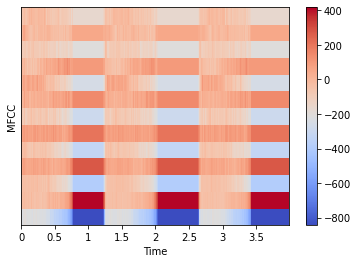

In [14]:
_plot_mfcc(bj_mfccs, bj_sr, bj_Ns);

Dove

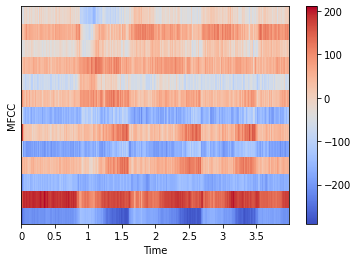

In [15]:
_plot_mfcc(dv_mfccs, dv_sr, dv_Ns);

Duck

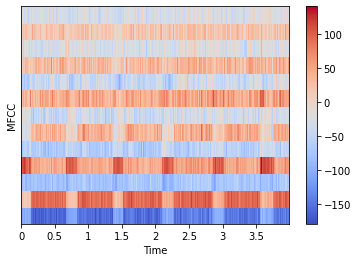

In [16]:
_plot_mfcc(du_mfccs, du_sr, du_Ns);

Now, we have extracted the features of three bird signals (BlueJay, Duck and Dove). We can use this feature extracted in various use cases such as `classification` into different clusters.

### Training GMM using MFCC features

Gaussian Mixture Model (GMM) helps to cluster the features. `sklearn.mixture` is a package which enables one to learn Gaussian Mixture Models (diagonal, spherical, tied and full covariance matrices supported), sample them, and estimate them from data. Facilities to help determine the appropriate number of components are also provided. 

For usage and more details, please refer to [scikit-learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [17]:
import sklearn
import sklearn.mixture
from scipy.io import savemat

#### Questions
*  **Q4**: Find the GMM parameters of the features found in 1. Since there are three Bird sounds, there will be three clusters. You can use existing GMM function provided from Python.

In [18]:
# Hints: 
# (1) Concatenate the MFCCs from all three sound files and become the feature matrix, 
#     leaving the last 50 samples for X_test. In the rest sets, 
#     define your training/validation set  X_train, X_val using train_test_split() 
#     and create the labels for each class y_train, y_val.
# (2) Instantiate a Scikit-Learn GMM model by using: 
#     model = sklearn.mixture.GaussianMixture(n_components, covariance_type, reg_covar, verbose, etc.)  
# (3) Train a model using model.fit(X_train). 
# (4) Predict the model: y_val_predict = model.predict(X_val)
# (5) Calculate the classification accuracy using accuracy_score(y_val_predict, y_val)
# (6) Report the y_test_predict = model.predict(X_test) and save your prediction results as     
 	# a HW1_P3Q4_results.mat file and submit it to canvas

1. Setup the data

In [55]:
from sklearn.model_selection import train_test_split

samples = np.vstack((bj_mfccs.T, dv_mfccs.T, du_mfccs.T))
labels = np.hstack((np.zeros((len(bj_mfccs.T),)), np.ones((len(dv_mfccs.T),)), np.full((len(du_mfccs.T),), 2)))

X_train, X_val, y_train, y_val = train_test_split(samples, labels, test_size=0.20, random_state=42)

X_test = X_train[:50]
y_test = y_train[:50]
X_train = X_train[50:]
y_train = y_train[50:]

2,3,4. Train & Predict with the GaussianMixture Model



In [22]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='tied').fit(X_train)  

y_val_cluster_ids = model.predict(X_val)

5. Validation Set Accuracy

In [23]:
from sklearn.metrics import accuracy_score 

def derive_labels(n_clusts, cluster_labels, true_labels):
  data_labels = np.zeros(n_clusts)
  
  for i in range(n_clusts):
    index = np.where(cluster_labels == i)
    counts = np.bincount(true_labels[index])
    data_labels[i] = np.argmax(counts)

  return [data_labels[i] for i in cluster_labels]

In [24]:
y_val_preds = derive_labels(3, y_val_cluster_ids, y_val.astype(int))

print(f'Validation Set Accuracy: {round(accuracy_score(y_val, y_val_preds)*100, 2)}%\n')

Validation Set Accuracy: 79.17%



Let's try to improve the accuracy by trying differeent number of components

6. Report Test Set Accuracy

In [25]:
y_test_cluster_ids = model.predict(X_test)
y_test_preds = derive_labels(3, y_test_cluster_ids, y_test.astype(int))

savemat("/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/HW1_P3Q4_results.mat", {"gmm": y_test_preds})

print(f'Test Set Accuracy: {round(accuracy_score(y_test, y_test_preds)*100, 2)}%\n')

Test Set Accuracy: 74.0%



### Training SVM for Bird Sound Classification

Support Vector Machine (SVM) helps to classification of the data. The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

For usage and more details, please refer to [scikit-learn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

`SVC` takes as input two arrays: an array `X` of shape (`n_samples`, `n_features`) holding the training samples, and an array `y` of class labels (strings or integers), of shape (`n_samples`):

In [26]:
# A simple example
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# After being fitted, the model can then be used to predict new values:
print(clf.predict([[2., 2.]]))
# You can also get support vectors from the trained model
print(clf.support_vectors_)

[1]
[[0. 0.]
 [1. 1.]]


In [28]:
from sklearn.metrics import accuracy_score 
# model outputs
outputs = clf.predict([[2., 2.]])
# label 
y = [1]

# We use accurarcy_score to get the model accuracy, which here is 1.0 (100%)
print("The accuracy is {}".format(accuracy_score(outputs, y)))

The accuracy is 1.0


#### Questions

*   **Q5**: Train the SVM model using the features found in 1. You can use existing SVM function provided from Python. 

In [27]:
# Hints: 
# (1) Concatenate the MFCCs from all three sound files and become the feature matrix, 
#     leaving the last 50 samples for X_test. In the rest sets, 
#     define your training/validation set  X_train, X_val using train_test_split() 
#     and create the labels for each class y_train, y_val.
# (2) Instantiate a Scikit-Learn SVM model by using: 
#     model = sklearn.svm.SVC()
# (3) Train a model using model.fit(X_train). 
# (4) Predict the model: y_val_predict = model.predict(X_val)
# (5) Calculate the classification accuracy using accuracy_score(y_val_predict, y_val)
# (6) Report the y_test_predict = model.predict(X_test) and save your prediction results as     
 	# a HW1_P3Q5_results.mat file and submit it to canvas
# TODO: Your code here. (You may use multiple code and text segments to display your solutions.)
# Q5
# ...

1. The data was setup above in problem 4

2,3,4. Train & Predict with the SVM Model

In [29]:
model = svm.SVC()
model.fit(X_train, y_train)

y_val_preds = model.predict(X_val)

5. Validation Set Accuracy

In [30]:
print(f'Validation Set Accuracy: {round(accuracy_score(y_val, y_val_preds)*100, 2)}%\n')

Validation Set Accuracy: 100.0%



6. Test Set Accuracy

In [31]:
y_svm_test_preds = model.predict(X_test)
savemat("/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/HW1_P3Q5_results.mat", {"svm": y_svm_test_preds})
print(f'Test Set Accuracy: {round(accuracy_score(y_test, y_svm_test_preds)*100, 2)}%\n')

Test Set Accuracy: 98.0%



### Training MLP for Bird Sound Classification

#### Questions

*   **Q6**: Train a MLP model for bird sound classification following the Pytorch_NN.ipynb tutorial. Calculate and report the classification accuracy. 

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

1. Setup Dataset

In [51]:
class BirdSpectrograms(Dataset):
    def __init__(self, mfccs, sound_labels):
        self.mfccs = mfccs 
        self.labels = sound_labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.mfccs[idx], self.labels[idx]

batch_size = 30
train_set = BirdSpectrograms(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_set = BirdSpectrograms(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_set = BirdSpectrograms(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

2. Setup Model

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class BirdNet(nn.Module):
    def __init__(self):
        super(BirdNet, self).__init__()
        self.lin1 = nn.Linear(13, 13)
        self.lin2 = nn.Linear(13, 3)

    def forward(self, x):
        x = self.lin1(x)
        return self.lin2(x)

model = BirdNet().to(device)

3. Train Model

In [47]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.004590  [    0/  907]
loss: 0.000240  [   30/  907]
loss: 0.020948  [   60/  907]
loss: 0.001488  [   90/  907]
loss: 0.002120  [  120/  907]
loss: 0.001354  [  150/  907]
loss: 0.003028  [  180/  907]
loss: 0.001437  [  210/  907]
loss: 0.000298  [  240/  907]
loss: 0.002994  [  270/  907]
loss: 0.000678  [  300/  907]
loss: 0.001489  [  330/  907]
loss: 0.001368  [  360/  907]
loss: 0.002081  [  390/  907]
loss: 0.000304  [  420/  907]
loss: 0.001627  [  450/  907]
loss: 0.008935  [  480/  907]
loss: 0.021187  [  510/  907]
loss: 0.012536  [  540/  907]
loss: 0.003024  [  570/  907]
loss: 0.001032  [  600/  907]
loss: 0.010427  [  630/  907]
loss: 0.019641  [  660/  907]
loss: 0.008539  [  690/  907]
loss: 0.001643  [  720/  907]
loss: 0.001391  [  750/  907]
loss: 0.000868  [  780/  907]
loss: 0.000250  [  810/  907]
loss: 0.000655  [  840/  907]
loss: 0.000755  [  870/  907]
loss: 0.000236  [  210/  907]
Test Error: 
 Accuracy: 97.9%,

4. Report Accuracy of Test Set

In [53]:
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.005453 

